In [1]:
using DataFrames, CSV, Statistics, CairoMakie

### Make boxplots of time spent on each phase

In [15]:
# Load the df
spent_time_per_section = DataFrame(CSV.File("../Data/Dataframes/time_spent_per_section.csv"))

show(first(spent_time_per_section, 10),allcols=true)

10×16 DataFrame
 Row │ User ID  Introduction  Placement  Pin Entry  Authentication  Lab Selection  Lab Initiation  module0  module1  module2  module3  module4  module5  module6  module7  Total   
     │ Int64    Float64       Float64    Float64    Float64         Float64        Float64         Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      88          8.68       3.14       5.54             0.0           3.95            9.27     9.98     8.96     6.59     7.45     8.57    11.82     9.39     2.26    97.5
   2 │     102          8.68      33.86      45.94             0.0          16.17            6.48   848.87   399.21   385.71    65.58   250.26   405.45    96.35    84.35  2650.48
   3 │     103          8.68      32.54      16.74             0.0           2.63      

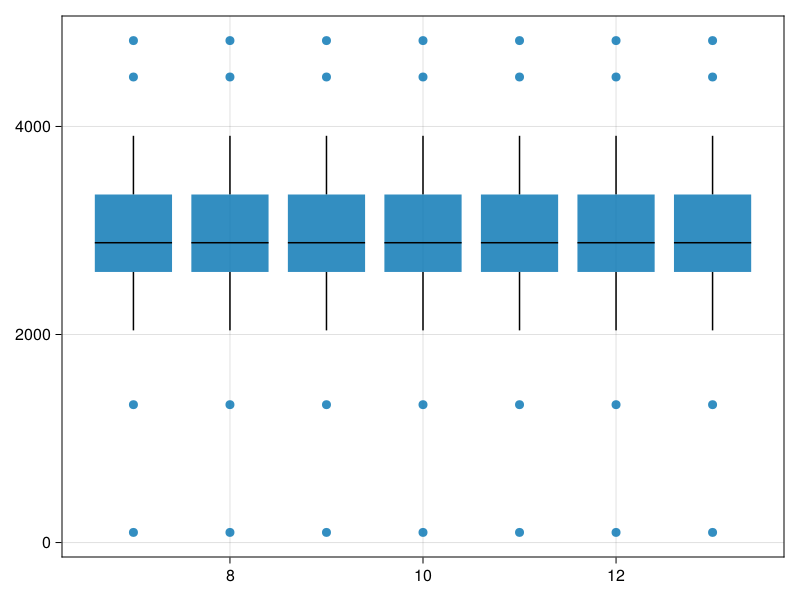

In [38]:
let
    # stack the time values into one long column, first column now labels what section it is on.
    # This is done because the makie boxplot function is a little strange
    stacked = stack(spent_time_per_section[:,8:end], 1:7)
    name_to_index_map = Dict()
    for (index,val) in enumerate(names(spent_time_per_section)[2:end])
        name_to_index_map[val] = index
    end
    xs = map(x -> name_to_index_map[x], stacked[:,"variable"])

    boxplot(xs, stacked[!,2])
end